<a href="https://colab.research.google.com/github/SaurabhIndi/Employee-Performance-Prediction-Flask-App/blob/main/Smartbridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshsarbahi/productivity-prediction-of-garment-employees")

print("Path to dataset files:", path)

100%|██████████| 16.1k/16.1k [00:00<00:00, 25.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/utkarshsarbahi/productivity-prediction-of-garment-employees/versions/1


In [ ]:
# prompt: read the uploaded dataset path : /root/.cache/kagglehub/datasets/utkarshsarbahi/productivity-prediction-of-garment-employees/versions/1

import pandas as pd
df = pd.read_csv('/root/.cache/kagglehub/datasets/utkarshsarbahi/productivity-prediction-of-garment-employees/versions/1/garments_worker_productivity.csv')
df


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Path to dataset files: /kaggle/input/productivity-prediction-of-garment-employees
                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.12

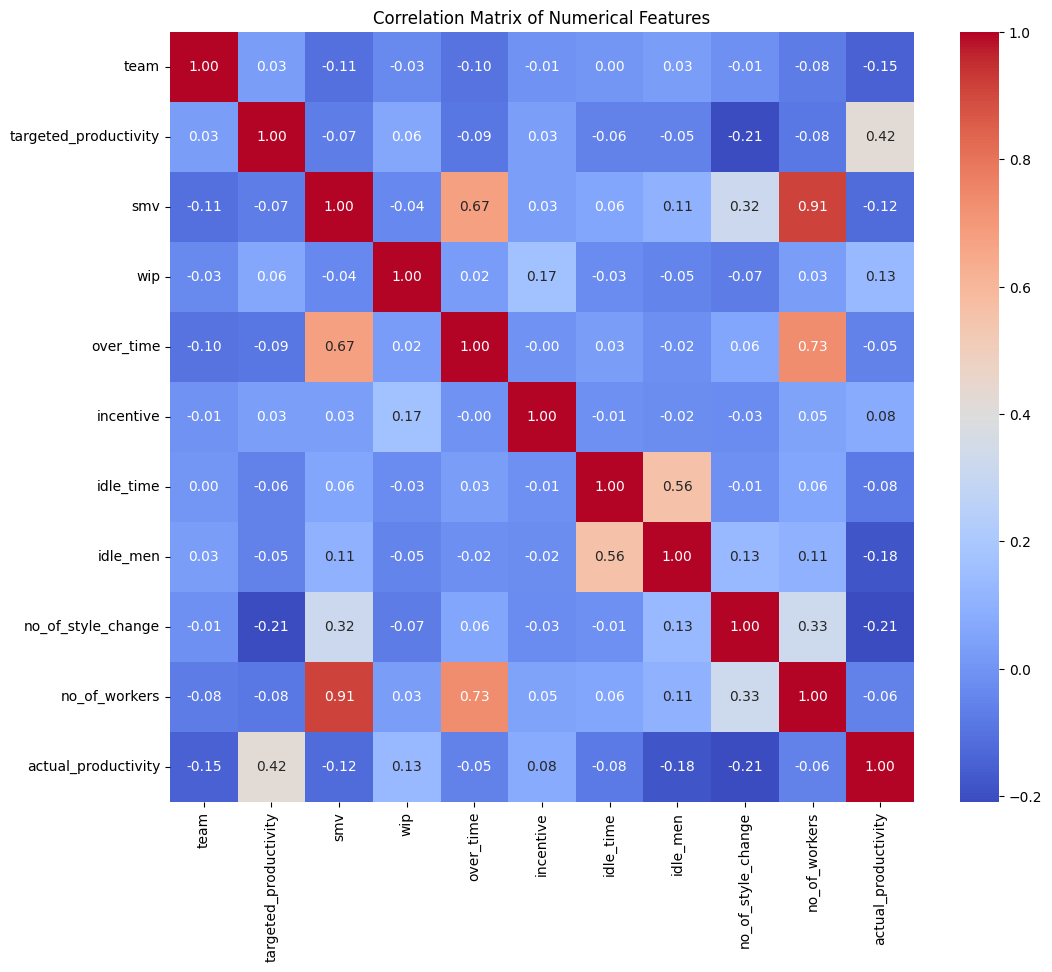

In [ ]:
# prompt: do correlation analysis on the dataset

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version (if not already downloaded)
try:
    path = kagglehub.dataset_download("utkarshsarbahi/productivity-prediction-of-garment-employees")
    print("Path to dataset files:", path)
except Exception as e:
    print(f"Error downloading dataset: {e}")
    # Try to load from the cache if download fails.
    path = '/root/.cache/kagglehub/datasets/utkarshsarbahi/productivity-prediction-of-garment-employees/versions/1/'


try:
    df = pd.read_csv(path + '/garments_worker_productivity.csv')
except FileNotFoundError:
    print(f"Error: CSV file not found in the expected location. Make sure the dataset is downloaded correctly.")
    # If you know the exact file path, modify this line accordingly
    df = pd.read_csv("/root/.cache/kagglehub/datasets/utkarshsarbahi/productivity-prediction-of-garment-employees/versions/1/garments_worker_productivity.csv")


# Handle potential errors during correlation analysis
try:
  # Select numerical columns for correlation analysis
  numerical_cols = df.select_dtypes(include=['number']).columns

  # Calculate the correlation matrix
  correlation_matrix = df[numerical_cols].corr()

  # Display the correlation matrix
  print(correlation_matrix)

  # Visualize the correlation matrix using a heatmap
  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Numerical Features')
  plt.show()

except KeyError as e:
    print(f"Error: Column not found: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

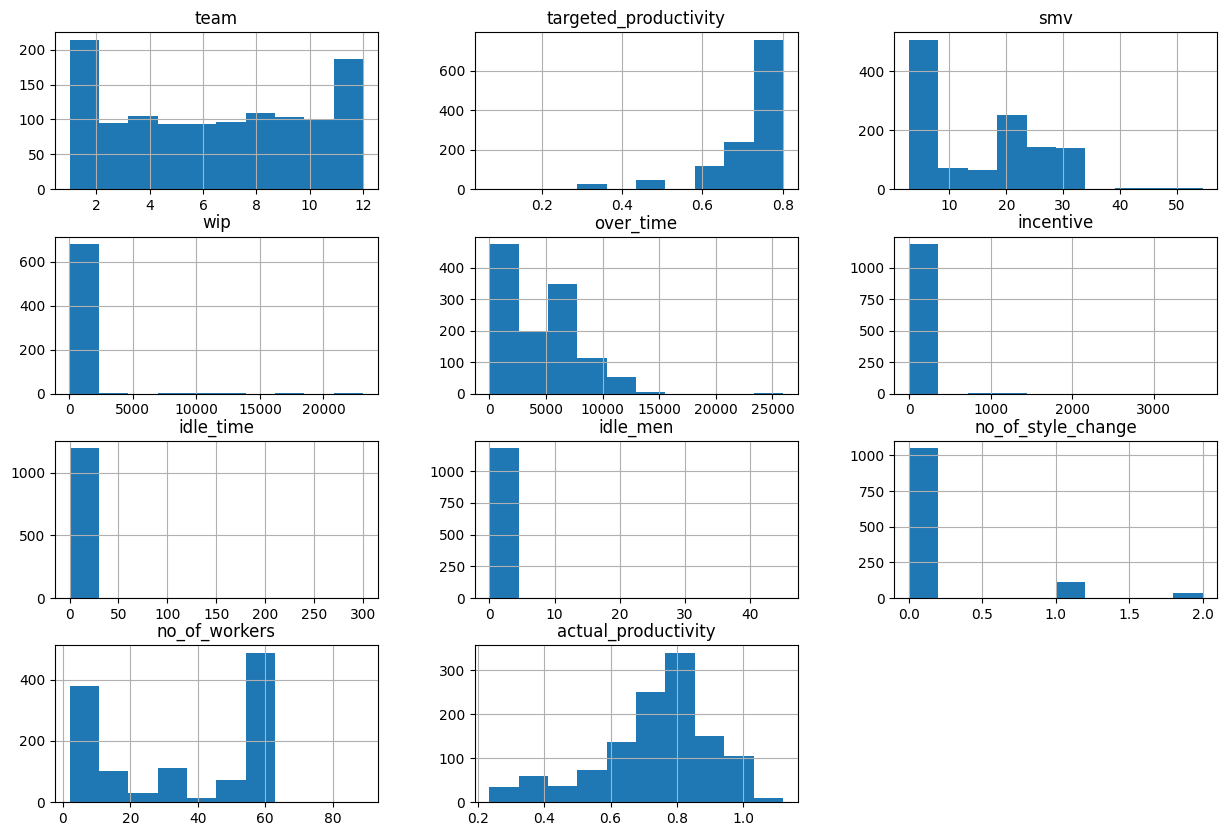

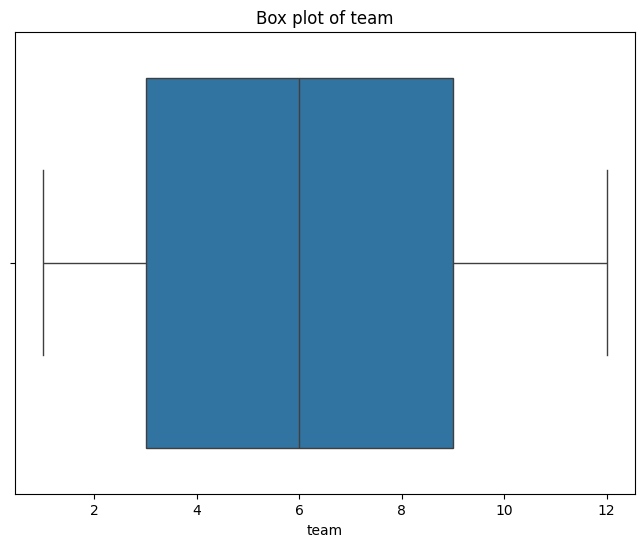

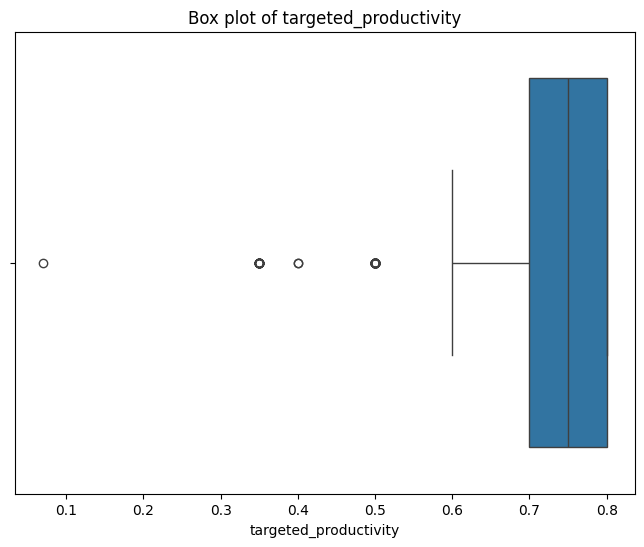

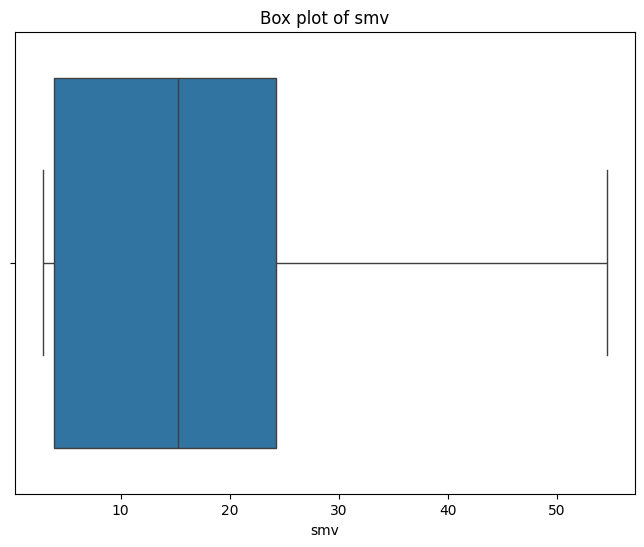

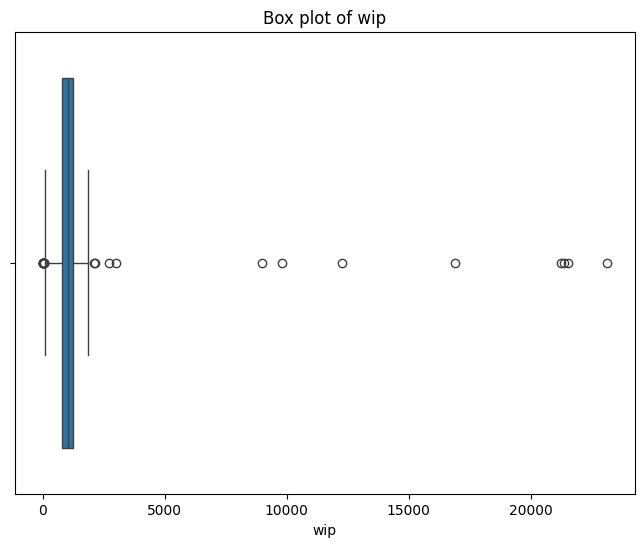

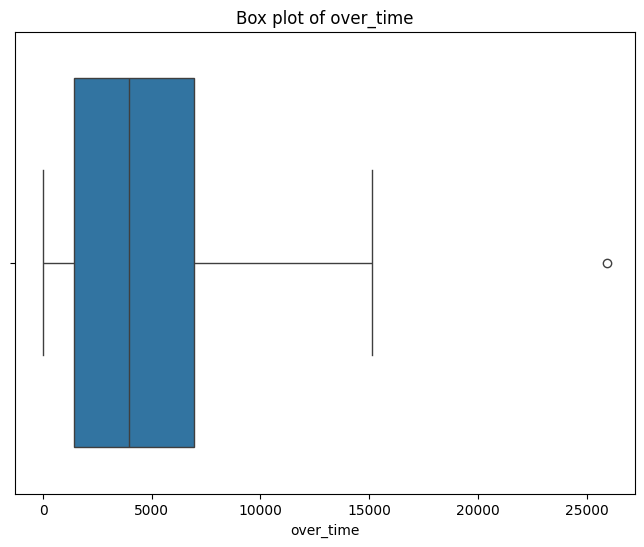

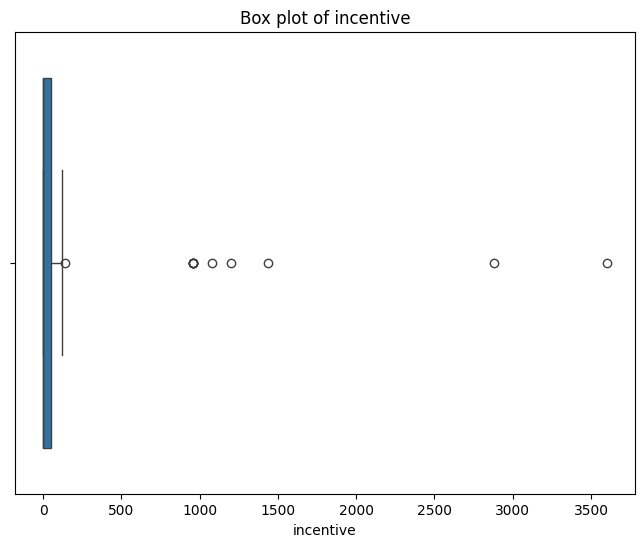

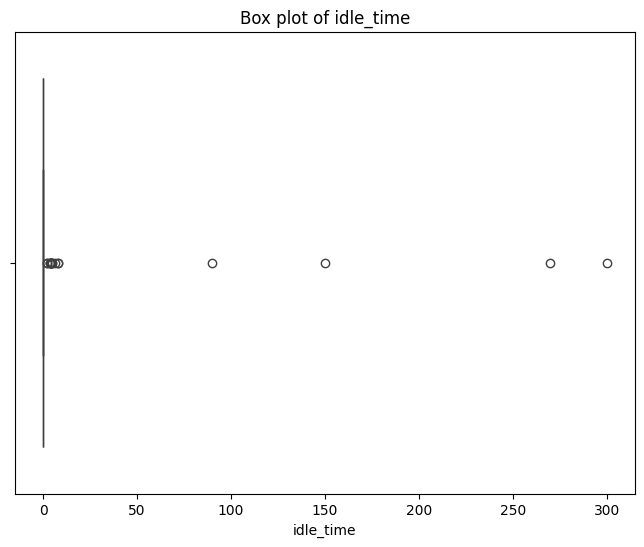

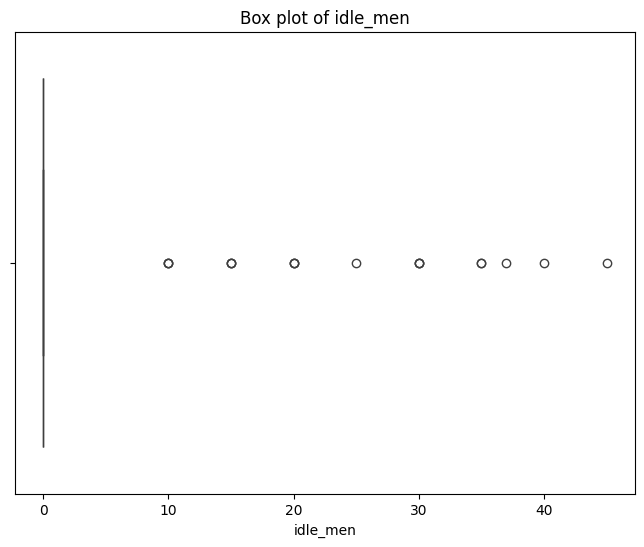

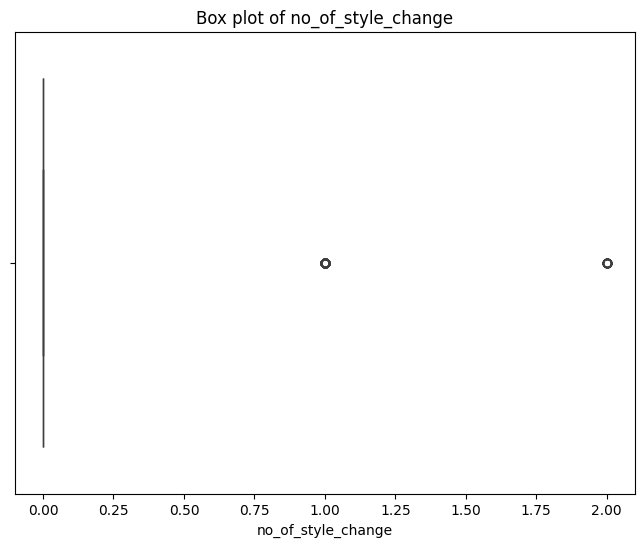

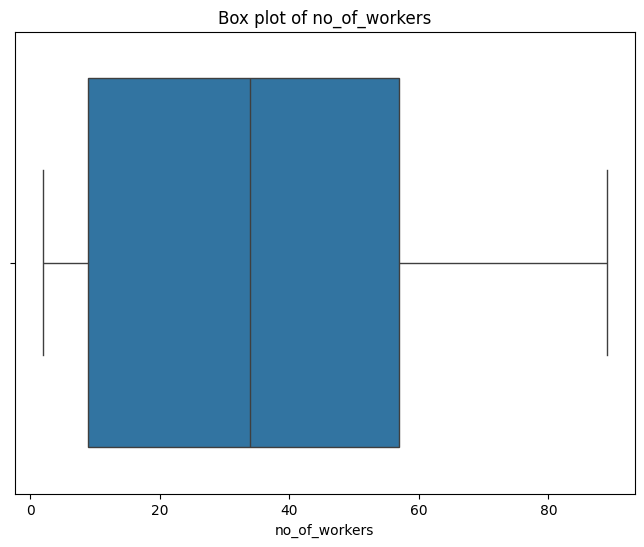

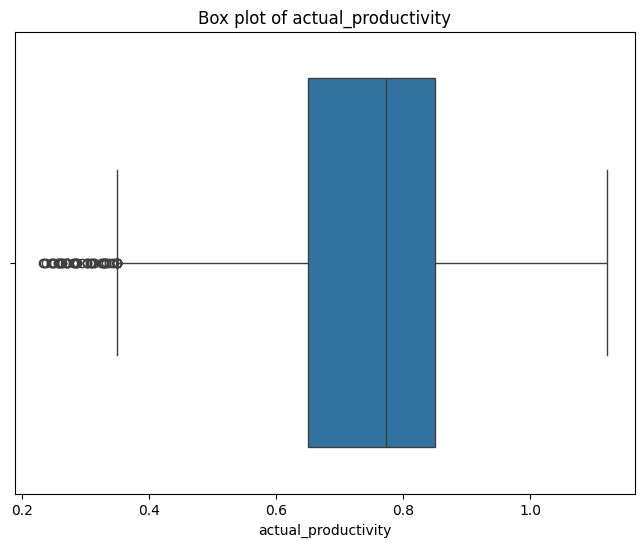

In [ ]:
# prompt: Dp descriptive analysis

import matplotlib.pyplot as plt
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of each column
print(df.dtypes)

# Unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())
    print(df[col].value_counts())

# Histograms for numerical features
df.hist(figsize=(15, 10))
plt.show()


# Box plots for numerical features to detect outliers
for col in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Box plot of {col}')
  plt.show()



In [ ]:
# prompt: for data preprocessing check for null values and resolve them

# ... (Your existing code)

# Check for missing values
print(df.isnull().sum())

# Resolve missing values (example using imputation)
for col in ['wip', 'over_time']:  # Replace with actual columns having missing values
    df[col].fillna(df[col].mean(), inplace=True) # Impute with mean. Choose strategy as per your needs
    # OR
    # df[col].fillna(df[col].median(), inplace=True) # Impute with median
    # OR
    # df[col].fillna(method='ffill', inplace=True) # Forward fill
    # OR
    # df[col].fillna(method='bfill', inplace=True) # Backward fill

# Verify if null values are resolved
print(df.isnull().sum())

# ... (Rest of your code)


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


<ipython-input-6-45f0dc3a8107>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True) # Impute with mean. Choose strategy as per your needs


In [ ]:
# prompt: In the preprocessing step, the `date` column is first converted into a datetime format to facilitate easier extraction of temporal features. From this, the month index is derived and stored in a new column named `month`. As the original `date` column becomes redundant after this transformation, it is subsequently dropped from the dataset. Additionally, the `department` column contains three values: "Sweing", "finishing", and another instance of "finishing". Since the "finishing" category appears twice, these duplicate entries are merged into a single category to ensure data consistency and avoid redundancy.

import pandas as pd
# Convert 'date' column to datetime and extract month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df = df.drop('date', axis=1)

# Correct the 'department' column
df['department'] = df['department'].replace({'finishing ': 'finishing'})


In [ ]:
# prompt: In this step, categorical values in the dataset are handled by converting them into numerical formats, which is essential for machine learning models. Since the dataset contains categorical features, they must be transformed using encoding techniques. Among the various encoding methods available, the project utilizes the **MultiColumnLabelEncoder** to perform this task efficiently. Specifically, the categorical columns identified for encoding are **quarter**, **department**, and **day**. Using the MultiColumnLabelEncoder, each of these columns is converted into a numerical format, enabling the dataset to be used effectively in modeling.

# ... (Your existing code)

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode

    def fit(self, X, y=None):
        return self  # not relevant here

    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                try:
                    output[col] = LabelEncoder().fit_transform(output[col])
                except KeyError as e:
                    print(f"Warning: Column '{e}' not found for encoding. Skipping.")
        else:
            for colname, col in output.iteritems():
                if isinstance(col.iloc[0], str):  # Check if the first element is a string
                  output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

# Initialize the MultiColumnLabelEncoder
encoder = MultiColumnLabelEncoder(columns=['quarter', 'department', 'day'])

# Fit and transform the categorical features
df = encoder.fit_transform(df)

# ... (Rest of your code)


In [ ]:
# prompt: In this step, the dataset is split into training and testing sets to prepare it for model training and evaluation. Initially, the data is separated into **features (`X`)** and the **target variable (`y`)**. The `X` variable is created by dropping the target column from the dataset, while the `y` variable holds only the target values. The features in `X` are then converted into an array format for compatibility with machine learning algorithms. To perform the actual split, the `train_test_split()` function from **scikit-learn** is used. This function takes `X`, `y`, `test_size`, and `random_state` as parameters to ensure reproducibility and control over the proportion of data allocated for testing.

from sklearn.model_selection import train_test_split
import numpy as np

# Separate features (X) and target variable (y)
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

# Convert features to array
X = np.array(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: In this step, a **Linear Regression** model is implemented for predictive analysis. The model is initialized using the `LinearRegression()` class and stored in a variable named **`model_lr`**. Once the model is trained, predictions are made on the **`x_test`** dataset and stored in a variable called **`pred_test`**. To evaluate the performance of the model, key regression metrics are calculated, including the **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and the **R² score**, which provide insights into the model's accuracy and goodness of fit.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
pred_test = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.10729554202727444
Mean Squared Error (MSE): 0.0213215177726329
R-squared (R2) Score: 0.19700424991908638


In [ ]:
# prompt: In this step, a **Random Forest** model is used for regression. The model is initialized using the `RandomForestRegressor()` class and stored in a variable named **`model_rf`**. After training the model, predictions are made on the **`x_test`** dataset and stored in a variable called **`pred`**. To assess the model’s performance, evaluation metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and the **R² score** are computed, helping to understand the accuracy and effectiveness of the Random Forest model in predicting outcomes.

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
pred = model_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.06895316457987492
Mean Squared Error (MSE): 0.011906931419272338
R-squared (R2) Score: 0.5515696664684526


In [ ]:
# prompt: In this step, an **XGBoost** model is applied for regression tasks. The model is initialized using the `XGBRegressor()` class and assigned to the variable **`model_xgb`**. After training the model, predictions are made on the **`x_test`** dataset and stored in a variable called **`pred3`**. To evaluate the performance of the XGBoost model, key metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and the **R² score** are calculated, providing insights into the model’s prediction accuracy and overall effectiveness.

from xgboost import XGBRegressor

# Initialize the XGBoost model
model_xgb = XGBRegressor()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
pred3 = model_xgb.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, pred3)
mse = mean_squared_error(y_test, pred3)
r2 = r2_score(y_test, pred3)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.07166284632385292
Mean Squared Error (MSE): 0.013740309300061277
R-squared (R2) Score: 0.48252230022253284


In [ ]:
# prompt: **Model Comparison**
# To compare the performance of the three models—**Linear Regression**, **Random Forest**, and **XGBoost**—the evaluation metrics used are **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R² Score**.
# ---
# ### **Linear Regression:**
# * **MSE**: *(value)*
# * **MAE**: *(value)*
# * **R² Score**: *(value)*
# ### **Random Forest:**
# * **MSE**: *(value)*
# * **MAE**: *(value)*
# * **R² Score**: *(value)*
# ### **XGBoost:**
# * **MSE**: *(value)*
# * **MAE**: *(value)*
# * **R² Score**: *(value)*
# ---
# After calling the evaluation function, the results for all three models are displayed. Among them, **XGBoost** shows the best performance across the evaluation metrics, making it the most effective model for this dataset.

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
pred_test = model_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, pred_test)
mse_lr = mean_squared_error(y_test, pred_test)
r2_lr = r2_score(y_test, pred_test)

print("Linear Regression:")
print(f"* MSE: {mse_lr}")
print(f"* MAE: {mae_lr}")
print(f"* R² Score: {r2_lr}")


# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print("\nRandom Forest:")
print(f"* MSE: {mse_rf}")
print(f"* MAE: {mae_rf}")
print(f"* R² Score: {r2_rf}")


# Initialize the XGBoost model
model_xgb = XGBRegressor()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)

print("\nXGBoost:")
print(f"* MSE: {mse_xgb}")
print(f"* MAE: {mae_xgb}")
print(f"* R² Score: {r2_xgb}")


Linear Regression:
* MSE: 0.0213215177726329
* MAE: 0.10729554202727444
* R² Score: 0.19700424991908638

Random Forest:
* MSE: 0.012260391903052186
* MAE: 0.07000757941154159
* R² Score: 0.5382578905750373

XGBoost:
* MSE: 0.013740309300061277
* MAE: 0.07166284632385292
* R² Score: 0.48252230022253284


In [ ]:
# prompt: Evaluating performance of the model and saving the model
# From sklearn, metrics r2_score is used to evaluate the score of the model. On the parameters, we have given y_test & pred3. Our model is performing well. So, we are saving the model by pickle.dump().

import pickle
from sklearn.metrics import r2_score

# Evaluate the model
r2 = r2_score(y_test, pred3)
print(f"R-squared (R2) Score: {r2}")

# Save the model
filename = 'xgb_model.sav'
pickle.dump(model_xgb, open(filename, 'wb'))


R-squared (R2) Score: 0.48252230022253284


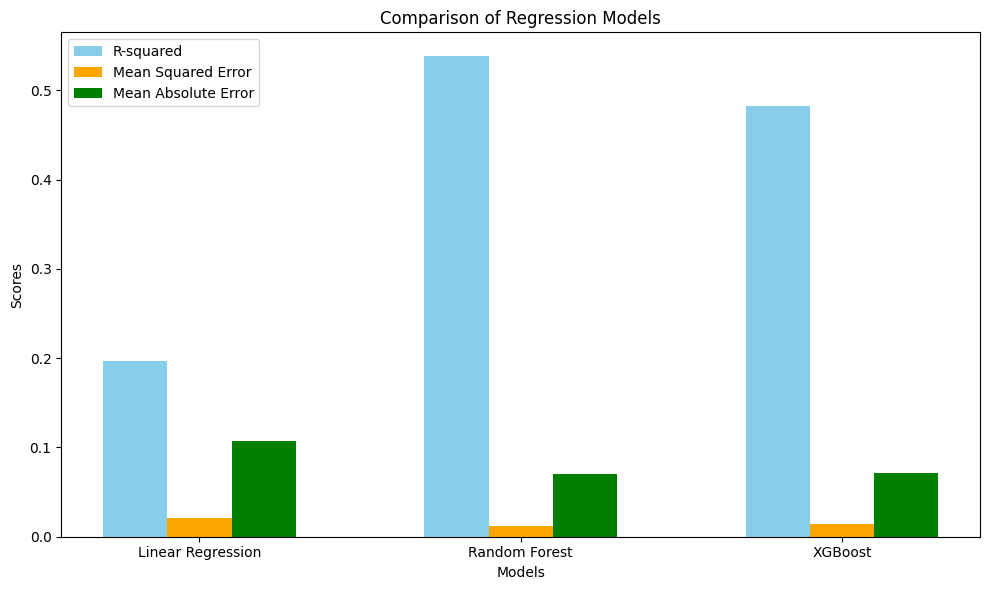

The best performing model is: Random Forest


In [ ]:
# prompt: generate code for visualization: comparing all the three models and tell which one is the best performing

import matplotlib.pyplot as plt

# Data for the bar chart
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [r2_lr, r2_rf, r2_xgb]
mse_scores = [mse_lr, mse_rf, mse_xgb]
mae_scores = [mae_lr, mae_rf, mae_xgb]

x = range(len(models))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, r2_scores, width=0.2, label='R-squared', color='skyblue')
plt.bar([i + 0.2 for i in x], mse_scores, width=0.2, label='Mean Squared Error', color='orange')
plt.bar([i + 0.4 for i in x], mae_scores, width=0.2, label='Mean Absolute Error', color='green')

# Customize the chart
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Regression Models")
plt.xticks([i + 0.2 for i in x], models)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Determine the best-performing model based on R-squared
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]
print(f"The best performing model is: {best_model}")


In [ ]:
# prompt: for the above
# Evaluating performance of the model and saving the model: compare xg boost and random forest and save on of them which is best performing

# Determine the best-performing model based on R-squared
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]

# Save the best-performing model
if best_model == "Random Forest":
    filename = 'rf_model.sav'
    pickle.dump(model_rf, open(filename, 'wb'))
elif best_model == "XGBoost":
    filename = 'xgb_model.sav'
    pickle.dump(model_xgb, open(filename, 'wb'))
else: #best_model == "Linear Regression":
    filename = 'lr_model.sav'
    pickle.dump(model_lr, open(filename, 'wb'))

print(f"The best performing model is: {best_model}, saved as {filename}")


The best performing model is: Random Forest, saved as rf_model.sav
